In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('hand.csv')

In [4]:
df.head()

,group,sex,right_b,right_a,left_b,left_a
0,ТПП-20,д,29.5,31.5,28.5,30.5
1,ТПП-21,д,35.5,31.5,23.5,29.5
2,ТПП-22,д,32.5,32.5,33.5,33.5
3,ТПП-23,д,28.5,29.5,27.5,27.0
4,ТПП-24,д,23.5,23.5,21.0,21.0


# Сравнение данных

In [5]:
# Общие данные
df.describe()

,right_b,right_a,left_b,left_a
count,113.000000,72.000000,113.000000,72.000000
mean,32.000000,34.770833,29.930088,32.463889
std,12.711251,13.494636,12.066726,12.982765
min,12.500000,10.000000,11.000000,9.000000
25%,23.000000,24.000000,21.000000,22.000000
50%,28.500000,31.500000,26.000000,29.750000
75%,38.500000,43.875000,38.500000,41.125000
max,76.000000,76.000000,70.000000,70.000000


In [6]:
df_rb = df["right_b"].dropna() # правая до
df_ra = df["right_a"].dropna() # правая после
df_lb = df["left_b"].dropna()  # левая до
df_la = df["left_a"].dropna()  # левая после

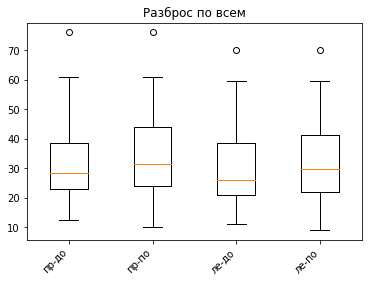

In [7]:
fig, ax = plt.subplots()
ax.set_title("Разброс по всем")
ax.boxplot(
    [df_rb, df_ra, df_lb, df_la],
    labels=["пр-до", "пр-по", "ле-до", "ле-по"]
)
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
df_g = df[df["sex"]=="д"]
df_b = df[df["sex"]=="м"]

df_grb = df_g["right_b"].dropna() # девочки правая до
df_gra = df_g["right_a"].dropna() # девочки правая после
df_glb = df_g["left_b"].dropna()  # девочки левая до
df_gla = df_g["left_a"].dropna()  # девочки левая после

df_brb = df_b["right_b"].dropna() # мальчики правая до
df_bra = df_b["right_a"].dropna() # мальчики правая после
df_blb = df_b["left_b"].dropna()  # мальчики левая до
df_bla = df_b["left_a"].dropna()  # мальчики левая после

In [9]:
for ds in [
    df_grb, # девочки правая до
    df_gra, # девочки правая после
    df_glb, # девочки левая до
    df_gla, # девочки левая после

    df_brb, # мальчики правая до
    df_bra, # мальчики правая после
    df_blb, # мальчики левая до
    df_bla, # мальчики левая после
]:
    print(ds.describe())

count    68.000000
mean     24.250000
std       5.785017
min      12.500000
25%      20.500000
50%      24.000000
75%      28.500000
max      36.000000
Name: right_b, dtype: float64
count    37.000000
mean     24.648649
std       5.729874
min      10.000000
25%      21.000000
50%      25.000000
75%      28.000000
max      36.000000
Name: right_a, dtype: float64
count    68.000000
mean     22.397059
std       5.042771
min      11.000000
25%      19.375000
50%      21.750000
75%      25.625000
max      34.500000
Name: left_b, dtype: float64
count    37.000000
mean     23.013514
std       5.535851
min       9.000000
25%      20.000000
50%      23.000000
75%      27.000000
max      33.500000
Name: left_a, dtype: float64
count    45.000000
mean     43.711111
std      11.279753
min      25.500000
25%      35.500000
50%      44.500000
75%      51.500000
max      76.000000
Name: right_b, dtype: float64
count    35.000000
mean     45.471429
std      10.777115
min      22.000000
25%      39.5000

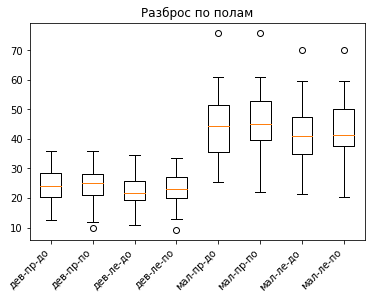

In [10]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам")
ax.boxplot([
    df_grb, # девочки правая до
    df_gra, # девочки правая после
    df_glb, # девочки левая до
    df_gla, # девочки левая после
 
    df_brb, # мальчики правая до
    df_bra, # мальчики правая после
    df_blb, # мальчики левая до
    df_bla, # мальчики левая после
],
    labels=[
        "дев-пр-до", "дев-пр-по", "дев-ле-до", "дев-ле-по",
        "мал-пр-до", "мал-пр-по", "мал-ле-до", "мал-ле-по"
    ]
)
plt.xticks(rotation=45, ha='right')
plt.show()

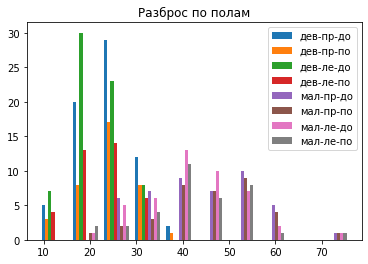

In [11]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам")
ax.hist([
    df_grb, # девочки правая до
    df_gra, # девочки правая после
    df_glb, # девочки левая до
    df_gla, # девочки левая после
 
    df_brb, # мальчики правая до
    df_bra, # мальчики правая после
    df_blb, # мальчики левая до
    df_bla, # мальчики левая после
],label=[
    "дев-пр-до", "дев-пр-по", "дев-ле-до", "дев-ле-по",
    "мал-пр-до", "мал-пр-по", "мал-ле-до", "мал-ле-по"
])
ax.legend(prop={'size': 10})
plt.show()

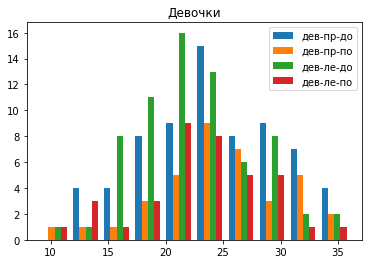

In [12]:
fig, ax = plt.subplots()
ax.set_title("Девочки")
ax.hist([ 
    df_grb, # девочки правая до
    df_gra, # девочки правая после
    df_glb, # девочки левая до
    df_gla, # девочки левая после
],label=["дев-пр-до", "дев-пр-по", "дев-ле-до", "дев-ле-по"])
ax.legend(prop={'size': 10})
plt.show()

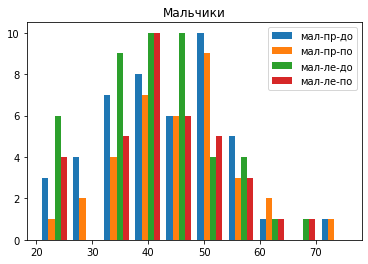

In [13]:
fig, ax = plt.subplots()
ax.set_title("Мальчики")
ax.hist([
    df_brb, # мальчики правая до
    df_bra, # мальчики правая после
    df_blb, # мальчики левая до
    df_bla, # мальчики левая после
],label=["мал-пр-до", "мал-пр-по", "мал-ле-до", "мал-ле-по"])
ax.legend(prop={'size': 10})
plt.show()

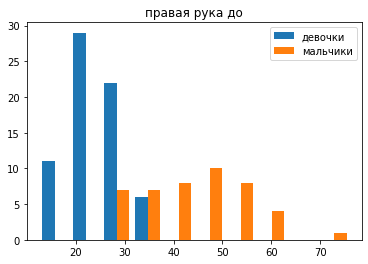

In [14]:
fig, ax = plt.subplots()
ax.set_title("правая рука до")
ax.hist([
    df_grb,
    df_brb,
],label=["девочки", "мальчики"])
ax.legend(prop={'size': 10})
plt.show()

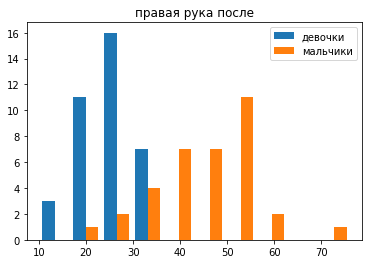

In [15]:
fig, ax = plt.subplots()
ax.set_title("правая рука после")
ax.hist([
    df_gra,
    df_bra,
],label=["девочки", "мальчики"])
ax.legend(prop={'size': 10})
plt.show()

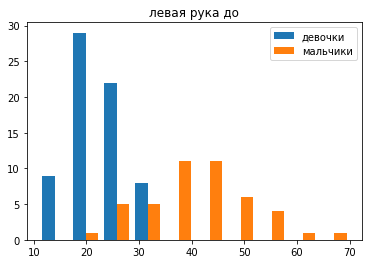

In [16]:
fig, ax = plt.subplots()
ax.set_title("левая рука до")
ax.hist([
    df_glb,
    df_blb,
],label=["девочки", "мальчики"])
ax.legend(prop={'size': 10})
plt.show()

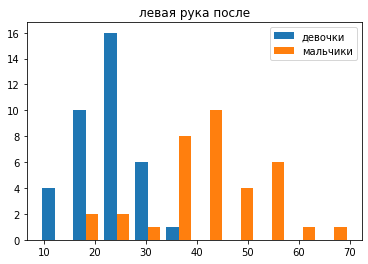

In [17]:
fig, ax = plt.subplots()
ax.set_title("левая рука после")
ax.hist([
    df_gla,
    df_bla,
],label=["девочки", "мальчики"])
ax.legend(prop={'size': 10})
plt.show()

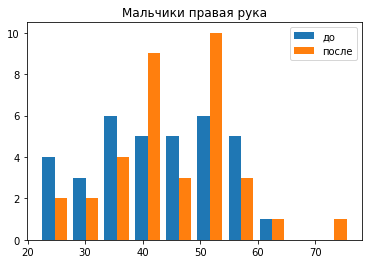

In [18]:
fig, ax = plt.subplots()
ax.set_title("Мальчики правая рука")
ax.hist([
    df_brb.sample(35),
    df_bra,
],label=["до", "после"])
ax.legend(prop={'size': 10})
plt.show()

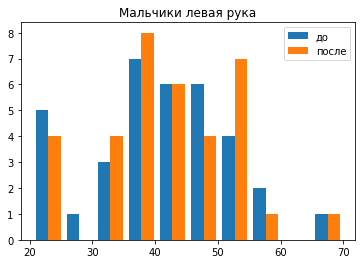

In [19]:
fig, ax = plt.subplots()
ax.set_title("Мальчики левая рука")
ax.hist([
    df_blb.sample(35),
    df_bla,
],label=["до", "после"])
ax.legend(prop={'size': 10})
plt.show()

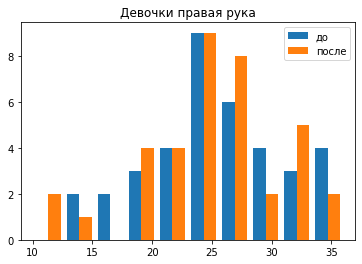

In [20]:
fig, ax = plt.subplots()
ax.set_title("Девочки правая рука")
ax.hist([
    df_grb.sample(37),
    df_gra,
],label=["до", "после"])
ax.legend(prop={'size': 10})
plt.show()

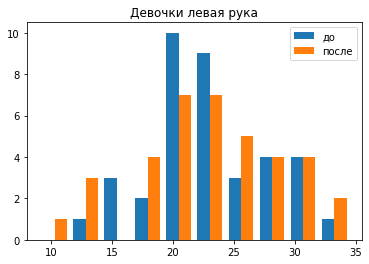

In [21]:
fig, ax = plt.subplots()
ax.set_title("Девочки левая рука")
ax.hist([
    df_glb.sample(37),
    df_gla,
],label=["до", "после"])
ax.legend(prop={'size': 10})
plt.show()

In [22]:
def draw_norm(df):
    mu, sigma = norm.fit(df)
    count, bins, ignored = plt.hist(df, density=False)
    density = len(df)*np.diff(bins)[0]
    plt.plot(bins,norm.pdf(bins, loc = mu, scale = sigma)*density)
    plt.title(f"Медиана: {mu:.2f} Сигма: {sigma:.2f}")
    plt.show()

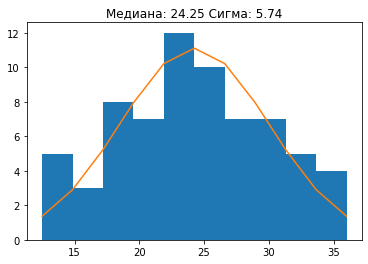

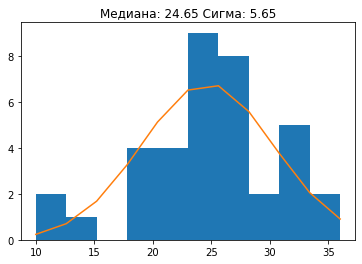

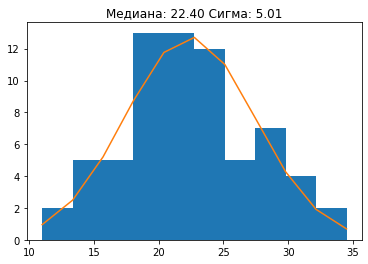

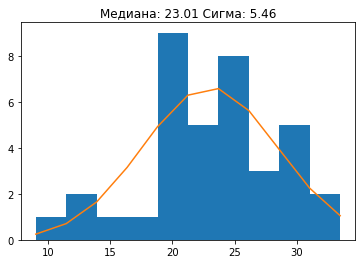

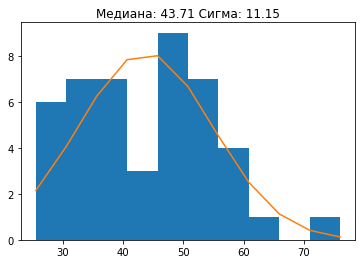

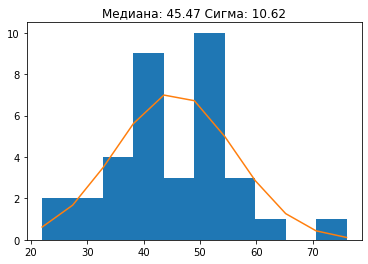

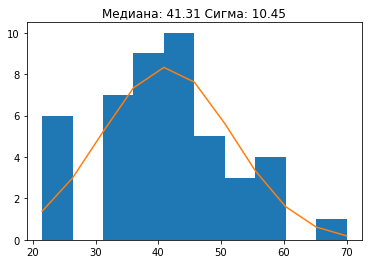

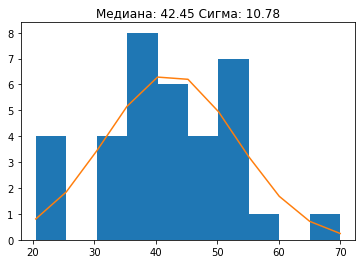

In [23]:
for ds in (
    df_grb,
    df_gra,
    df_glb,
    df_gla,

    df_brb,
    df_bra,
    df_blb,
    df_bla,):
    draw_norm(ds)

In [24]:
# Тест на нормальное распределение по метрике Колмогорова-Смирнова
# Чтобы утверждать что отличается от нормального pvalue должно быть < 0.05
from scipy.stats import kstest, norm

for ds in (
    df_grb, # девочки правая до
    df_gra, # девочки правая после
    df_glb, # девочки левая до
    df_gla, # девочки левая после
 
    df_brb, # мальчики правая до
    df_bra, # мальчики правая после
    df_blb, # мальчики левая до
    df_bla, # мальчики левая после
):
    mu, sigma = norm.fit(ds)
    ks_statistic, p_value = kstest(ds.values, "norm", args=(mu, sigma))
    print(ks_statistic, p_value)

0.05252926537456204 0.9870061140773716
0.0879616782765113 0.9130419196267813
0.0952107244735087 0.5369367552712585
0.09603326459585715 0.8523661883706067
0.08761113754245087 0.8503229759396584
0.07507957881156446 0.9806274990760719
0.0619225146095404 0.9910278956027987
0.08256767718293878 0.9549075271105575


In [25]:
# Сравнение руки до и после по метрике Колмогорова-Смирнова
# Чтобы утверждать до и после отличаются pvalue должно быть < 0.05
from scipy.stats import ks_2samp
print(ks_2samp(df_grb, df_gra)) # девочки правая до и после
print(ks_2samp(df_glb, df_gla)) # девочки левая до и после
print(ks_2samp(df_brb, df_bra)) # мальчики правая до и после
print(ks_2samp(df_blb, df_bla)) # мальчики левая до и после

KstestResult(statistic=0.09976152623211447, pvalue=0.9446767394792371)
KstestResult(statistic=0.12678855325914148, pvalue=0.7767579840854041)
KstestResult(statistic=0.1492063492063492, pvalue=0.7125204776926608)
KstestResult(statistic=0.09523809523809523, pvalue=0.9839940433054091)


In [76]:
# Сравнение руки до и после t-тест зависимых выборок
# Чтобы утверждать до и после отличаются pvalue должно быть < 0.05
from scipy.stats import ttest_rel
print(ttest_rel(df_grb.head(37), df_gra)) # девочки правая до и после
print(ttest_rel(df_glb.head(37), df_gla)) # девочки левая до и после
print(ttest_rel(df_brb.head(35), df_bra)) # мальчики правая до и после
print(ttest_rel(df_blb.head(35), df_bla)) # мальчики левая до и после

Ttest_relResult(statistic=0.9203156936688812, pvalue=0.3635339886643185)
Ttest_relResult(statistic=-0.81458805460028, pvalue=0.4206643271392093)
Ttest_relResult(statistic=0.6399634901251147, pvalue=0.5264856400644218)
Ttest_relResult(statistic=1.4731505205054043, pvalue=0.1499087744388358)


In [27]:
# Сравнение руки до и после критерий Манна-Уитни
# Чтобы утверждать до и после отличаются pvalue должно быть < 0.05
from scipy.stats import mannwhitneyu
print(mannwhitneyu(df_grb, df_gra)) # девочки правая до и после
print(mannwhitneyu(df_glb, df_gla)) # девочки левая до и после
print(mannwhitneyu(df_brb, df_bra)) # мальчики правая до и после
print(mannwhitneyu(df_blb, df_bla)) # мальчики левая до и после

MannwhitneyuResult(statistic=1175.0, pvalue=0.5797030354863243)
MannwhitneyuResult(statistic=1122.5, pvalue=0.36463247227512974)
MannwhitneyuResult(statistic=702.0, pvalue=0.40956519042820805)
MannwhitneyuResult(statistic=741.5, pvalue=0.6588230371338681)


In [28]:
# Сравнение мальчиков и девочек по метрике Колмогорова-Смирнова
# Чтобы утверждать что мальчики и девочки отличаются pvalue должно быть < 0.05
from scipy.stats import ks_2samp
print(ks_2samp(df_grb, df_brb)) # правая до мальчики и девочки
print(ks_2samp(df_glb, df_blb)) # левая до мальчики и девочки
print(ks_2samp(df_gra, df_bra)) # правая после мальчики и девочки
print(ks_2samp(df_gla, df_bla)) # левая после мальчики и девочки

KstestResult(statistic=0.7562091503267974, pvalue=1.6653345369377348e-15)
KstestResult(statistic=0.8372549019607843, pvalue=3.3306690738754696e-16)
KstestResult(statistic=0.8586872586872587, pvalue=6.272760089132134e-14)
KstestResult(statistic=0.8316602316602316, pvalue=6.260547635861258e-13)


In [29]:
# Сравнение мальчиков и девочек t-тест
# Чтобы утверждать что мальчики и девочки отличаются pvalue должно быть < 0.05
from scipy.stats import ttest_ind
print(ttest_ind(df_grb, df_brb)) # правая до мальчики и девочки
print(ttest_ind(df_glb, df_blb)) # левая до мальчики и девочки
print(ttest_ind(df_gra, df_bra)) # правая после мальчики и девочки
print(ttest_ind(df_gla, df_bla)) # левая после мальчики и девочки

Ttest_indResult(statistic=-12.049773606958102, pvalue=6.890958149758415e-22)
Ttest_indResult(statistic=-12.748317294757879, pvalue=1.7836980877247572e-23)
Ttest_indResult(statistic=-10.3147671017328, pvalue=1.084427629085612e-15)
Ttest_indResult(statistic=-9.594186436535711, pvalue=2.172916449308709e-14)


In [30]:
# Сравнение мальчиков и девочек критерий Манна-Уитни
# Чтобы утверждать что мальчики и девочки отличаются pvalue должно быть < 0.05
from scipy.stats import mannwhitneyu
print(mannwhitneyu(df_grb, df_brb)) # правая до мальчики и девочки
print(mannwhitneyu(df_glb, df_blb)) # левая до мальчики и девочки
print(mannwhitneyu(df_gra, df_bra)) # правая после мальчики и девочки
print(mannwhitneyu(df_gla, df_bla)) # левая после мальчики и девочки

MannwhitneyuResult(statistic=169.0, pvalue=1.4464548304132191e-15)
MannwhitneyuResult(statistic=165.0, pvalue=1.1922642764308065e-15)
MannwhitneyuResult(statistic=52.0, pvalue=2.0052005541551142e-11)
MannwhitneyuResult(statistic=87.0, pvalue=2.741770338143012e-10)


# Только левши

In [31]:
# Левши до и после
left = df[df["right_b"] < df["left_b"]]
left.describe()

,right_b,right_a,left_b,left_a
count,25.000000,14.000000,25.000000,14.000000
mean,25.100000,32.642857,28.800000,34.128571
std,9.376389,11.578210,10.326947,11.854920
min,12.500000,19.000000,14.500000,14.000000
25%,19.000000,24.125000,21.000000,26.250000
50%,23.000000,28.750000,27.000000,32.000000
75%,31.500000,40.625000,33.500000,40.000000
max,50.000000,53.500000,51.000000,55.000000


In [32]:
dfl_g = left[left["sex"]=="д"]
dfl_b = left[left["sex"]=="м"]

dfl_grb = dfl_g["right_b"].dropna() # девочки правая до
dfl_gra = dfl_g["right_a"].dropna() # девочки правая после
dfl_glb = dfl_g["left_b"].dropna()  # девочки левая до
dfl_gla = dfl_g["left_a"].dropna()  # девочки левая после

dfl_brb = dfl_b["right_b"].dropna() # мальчики правая до
dfl_bra = dfl_b["right_a"].dropna() # мальчики правая после
dfl_blb = dfl_b["left_b"].dropna()  # мальчики левая до
dfl_bla = dfl_b["left_a"].dropna()  # мальчики левая после

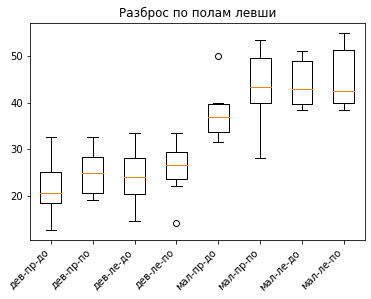

In [33]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам левши")
ax.boxplot([
    dfl_grb, # девочки правая до
    dfl_gra, # девочки правая после
    dfl_glb, # девочки левая до
    dfl_gla, # девочки левая после

    dfl_brb, # мальчики правая до
    dfl_bra, # мальчики правая после
    dfl_blb, # мальчики левая до
    dfl_bla, # мальчики левая после
],
    labels=[
        "дев-пр-до", "дев-пр-по", "дев-ле-до", "дев-ле-по",
        "мал-пр-до", "мал-пр-по", "мал-ле-до", "мал-ле-по"
    ]
)
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
# Сравнение левшей руки до и после по метрике Колмогорова-Смирнова
# Чтобы утверждать до и после отличаются pvalue должно быть < 0.05
from scipy.stats import ks_2samp
print(ks_2samp(dfl_grb, dfl_gra)) # девочки правая до и после
print(ks_2samp(dfl_glb, dfl_gla)) # девочки левая до и после
print(ks_2samp(dfl_brb, dfl_bra)) # мальчики правая до и после
print(ks_2samp(dfl_blb, dfl_bla)) # мальчики левая до и после

KstestResult(statistic=0.32894736842105265, pvalue=0.4647315969055099)
KstestResult(statistic=0.24342105263157895, pvalue=0.8140549305766698)
KstestResult(statistic=0.5, pvalue=0.474025974025974)
KstestResult(statistic=0.3333333333333333, pvalue=0.9307359307359307)


In [79]:
# Сравнение левшей руки до и после t-тест зависимых выборок
# Чтобы утверждать до и после отличаются pvalue должно быть < 0.05
from scipy.stats import ttest_rel
print(ttest_rel(dfl_grb.head(8), dfl_gra)) # девочки правая до и после
print(ttest_rel(dfl_glb.head(8), dfl_gla)) # девочки левая до и после
print(ttest_rel(dfl_brb.head(8), dfl_bra)) # мальчики правая до и после
print(ttest_rel(dfl_blb.head(8), dfl_bla)) # мальчики левая до и после

Ttest_relResult(statistic=-0.6856743058707562, pvalue=0.514977655869659)
Ttest_relResult(statistic=1.1751831688630032, pvalue=0.2783418569911595)
Ttest_relResult(statistic=-1.5454886061848316, pvalue=0.1828904981063623)
Ttest_relResult(statistic=-1.2456636192604293, pvalue=0.26807594197124435)


In [36]:
# Сравнение левшей руки до и после критерий Манна-Уитни
# Чтобы утверждать до и после отличаются pvalue должно быть < 0.05
from scipy.stats import mannwhitneyu
print(mannwhitneyu(dfl_grb, dfl_gra)) # девочки правая до и после
print(mannwhitneyu(dfl_glb, dfl_gla)) # девочки левая до и после
print(mannwhitneyu(dfl_brb, dfl_bra)) # мальчики правая до и после
print(mannwhitneyu(dfl_blb, dfl_bla)) # мальчики левая до и после

MannwhitneyuResult(statistic=44.0, pvalue=0.09314214898761558)
MannwhitneyuResult(statistic=61.5, pvalue=0.4561423707450787)
MannwhitneyuResult(statistic=10.0, pvalue=0.24025974025974026)
MannwhitneyuResult(statistic=16.0, pvalue=0.8098548786049068)


# Только Правши

In [37]:
# Правши до и после
right = df[df["right_b"] >= df["left_b"]]
right.describe()

,right_b,right_a,left_b,left_a
count,88.000000,58.000000,88.000000,58.000000
mean,33.960227,35.284483,30.251136,32.062069
std,12.891283,13.959877,12.552126,13.306137
min,14.000000,10.000000,11.000000,9.000000
25%,24.375000,24.250000,20.875000,21.125000
50%,30.250000,32.000000,25.250000,28.250000
75%,42.625000,44.625000,39.625000,41.375000
max,76.000000,76.000000,70.000000,70.000000


In [38]:
dfr_g = right[right["sex"]=="д"]
dfr_b = right[right["sex"]=="м"]

dfr_grb = dfr_g["right_b"].dropna() # девочки правая до
dfr_gra = dfr_g["right_a"].dropna() # девочки правая после
dfr_glb = dfr_g["left_b"].dropna()  # девочки левая до
dfr_gla = dfr_g["left_a"].dropna()  # девочки левая после

dfr_brb = dfr_b["right_b"].dropna() # мальчики правая до
dfr_bra = dfr_b["right_a"].dropna() # мальчики правая после
dfr_blb = dfr_b["left_b"].dropna()  # мальчики левая до
dfr_bla = dfr_b["left_a"].dropna()  # мальчики левая после

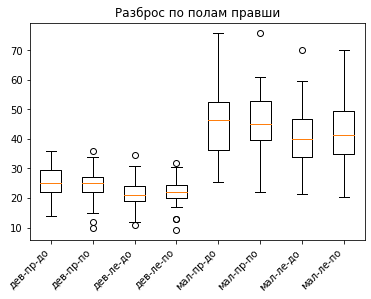

In [39]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам правши")
ax.boxplot([
    dfr_grb, # девочки правая до
    dfr_gra, # девочки правая после
    dfr_glb, # девочки левая до
    dfr_gla, # девочки левая после
  
    dfr_brb, # мальчики правая до
    dfr_bra, # мальчики правая после
    dfr_blb, # мальчики левая до
    dfr_bla, # мальчики левая после
],
    labels=[
        "дев-пр-до", "дев-пр-по", "дев-ле-до", "дев-ле-по",
        "мал-пр-до", "мал-пр-по", "мал-ле-до", "мал-ле-по"
    ]
)
plt.xticks(rotation=45, ha='right')
#plt.xticks(rotation=-45, ha='left')
plt.show()

In [40]:
# Сравнение руки до и после по метрике Колмогорова-Смирнова
# Чтобы утверждать до и после отличаются pvalue должно быть < 0.05
from scipy.stats import ks_2samp
print(ks_2samp(dfr_grb, dfr_gra)) # девочки правая до и после
print(ks_2samp(dfr_glb, dfr_gla)) # девочки левая до и после
print(ks_2samp(dfr_brb, dfr_bra)) # мальчики правая до и после
print(ks_2samp(dfr_blb, dfr_bla)) # мальчики левая до и после

KstestResult(statistic=0.12596762843068263, pvalue=0.8900353289206994)
KstestResult(statistic=0.1386347642505278, pvalue=0.8176129842570787)
KstestResult(statistic=0.11052166224580018, pvalue=0.9656738645448222)
KstestResult(statistic=0.07957559681697612, pvalue=0.9992411047081996)


In [83]:
# Сравнение руки до и после по метрике t-тест зависимых выборок
# Чтобы утверждать до и после отличаются pvalue должно быть < 0.05
from scipy.stats import ttest_rel
print(ttest_rel(dfr_grb.head(29), dfr_gra)) # девочки правая до и после
print(ttest_rel(dfr_glb.head(29), dfr_gla)) # девочки левая до и после
print(ttest_rel(dfr_brb.head(29), dfr_bra)) # мальчики правая до и после
print(ttest_rel(dfr_blb.head(29), dfr_bla)) # мальчики левая до и после

Ttest_relResult(statistic=1.4818571153828424, pvalue=0.1495459750107324)
Ttest_relResult(statistic=-2.1494681449714075, pvalue=0.04038408918951659)
Ttest_relResult(statistic=2.0138120023657384, pvalue=0.05372926278006202)
Ttest_relResult(statistic=1.7239824792633567, pvalue=0.09573716724648504)


In [42]:
# Сравнение руки до и после критерий Манна-Уитни
# Чтобы утверждать до и после отличаются pvalue должно быть < 0.05
from scipy.stats import mannwhitneyu
print(mannwhitneyu(dfr_grb, dfr_gra)) # девочки правая до и после
print(mannwhitneyu(dfr_glb, dfr_gla)) # девочки левая до и после
print(mannwhitneyu(dfr_brb, dfr_bra)) # мальчики правая до и после
print(mannwhitneyu(dfr_blb, dfr_bla)) # мальчики левая до и после

MannwhitneyuResult(statistic=747.5, pvalue=0.7056465590915952)
MannwhitneyuResult(statistic=631.5, pvalue=0.41635799948073215)
MannwhitneyuResult(statistic=526.0, pvalue=0.6285381576576418)
MannwhitneyuResult(statistic=538.0, pvalue=0.7376380902650799)


In [43]:
# Амбидекстров будем считать праворукими
df[df["right_b"] == df["left_b"]]

,group,sex,right_b,right_a,left_b,left_a
20,ФС-20,д,16.0,15.0,16.0,13.0
34,ФС-34,д,17.0,10.0,17.0,19.0
52,ЭЭ-27,м,32.0,36.0,32.0,39.0
67,ЭЭ-42,м,35.0,35.0,35.0,35.0
70,ЭЭ-44,д,19.5,22.0,19.5,20.0
83,PRЖ-31,д,34.5,NaN,34.5,NaN
94,ИЯ-25,д,20.5,NaN,20.5,NaN
110,ИЯ-40,м,26.0,NaN,26.0,NaN


# Сравнение доминантной руки с подчиненной

In [44]:
# Правши и амбидекстры
df_dex = df[df["right_b"] >= df["left_b"]].copy()
df_dex.columns = ['group', 'sex', 'dom_b', 'dom_a', 'sub_b', 'sub_a']
# Левши
df_sin = df[df["right_b"] < df["left_b"]].copy()
df_sin.columns = ['group', 'sex', 'sub_b', 'sub_a', 'dom_b', 'dom_a']

dfh = pd.concat([df_dex, df_sin])

In [45]:
dfh.describe()

,dom_b,dom_a,sub_b,sub_a
count,113.000000,72.000000,113.000000,72.000000
mean,32.818584,35.059722,29.111504,32.175000
std,12.512862,13.505415,12.076377,12.912793
min,14.000000,10.000000,11.000000,9.000000
25%,24.000000,24.750000,20.000000,21.375000
50%,28.500000,32.000000,24.500000,28.750000
75%,40.000000,43.875000,37.000000,41.125000
max,76.000000,76.000000,70.000000,70.000000


In [46]:
dfh_db = dfh["dom_b"].dropna() # правая до
dfh_da = dfh["dom_a"].dropna() # правая после
dfh_sb = dfh["sub_b"].dropna() # левая до
dfh_sa = dfh["sub_a"].dropna() # левая после

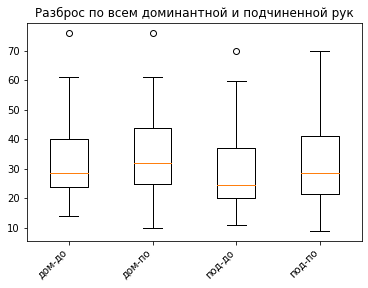

In [47]:
fig, ax = plt.subplots()
ax.set_title("Разброс по всем доминантной и подчиненной рук")
ax.boxplot(
    [dfh_db, dfh_da, dfh_sb, dfh_sa],
    labels=["дом-до", "дом-по", "под-до", "под-по"]
)
plt.xticks(rotation=45, ha='right')
plt.show()

In [48]:
dfh_g = dfh[dfh["sex"]=="д"]
dfh_b = dfh[dfh["sex"]=="м"]

dfh_gdb = dfh_g["dom_b"].dropna()  # девочки доминантная до
dfh_gda = dfh_g["dom_a"].dropna()  # девочки доминантная после
dfh_gsb = dfh_g["sub_b"].dropna()  # девочки подчиненная до
dfh_gsa = dfh_g["sub_a"].dropna()  # девочки подчиненная после

dfh_bdb = dfh_b["dom_b"].dropna()  # мальчики доминантная до
dfh_bda = dfh_b["dom_a"].dropna()  # мальчики доминантная после
dfh_bsb = dfh_b["sub_b"].dropna()  # мальчики подчиненная до
dfh_bsa = dfh_b["sub_a"].dropna()  # мальчики подчиненная после

In [49]:
for ds in [
    dfh_gdb, # девочки доминантная до
    dfh_gda, # девочки доминантная после
    dfh_gsb, # девочки подчиненная до
    dfh_gsa, # девочки подчиненная после
 
    dfh_bdb, # мальчики доминантная до
    dfh_bda, # мальчики доминантная после
    dfh_bsb, # мальчики подчиненная до
    dfh_bsa, # мальчики подчиненная после
]:
    print(ds.describe())

count    68.000000
mean     25.073529
std       5.442553
min      14.000000
25%      21.000000
50%      25.000000
75%      28.625000
max      36.000000
Name: dom_b, dtype: float64
count    37.000000
mean     24.851351
std       5.924132
min      10.000000
25%      22.000000
50%      25.000000
75%      29.000000
max      36.000000
Name: dom_a, dtype: float64
count    68.000000
mean     21.573529
std       4.980008
min      11.000000
25%      18.875000
50%      21.000000
75%      24.500000
max      34.500000
Name: sub_b, dtype: float64
count    37.000000
mean     22.810811
std       5.255092
min       9.000000
25%      20.000000
50%      23.000000
75%      26.000000
max      32.500000
Name: sub_a, dtype: float64
count    45.000000
mean     44.522222
std      10.983953
min      25.500000
25%      38.000000
50%      46.500000
75%      51.500000
max      76.000000
Name: dom_b, dtype: float64
count    35.000000
mean     45.851429
std      10.508774
min      22.000000
25%      39.750000
50%  

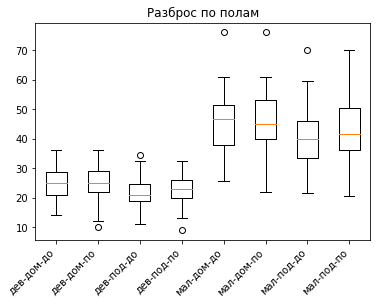

In [50]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам")
ax.boxplot([
    dfh_gdb, # девочки доминантная до
    dfh_gda, # девочки доминантная после
    dfh_gsb, # девочки подчиненная до
    dfh_gsa, # девочки подчиненная после
 
    dfh_bdb, # мальчики доминантная до
    dfh_bda, # мальчики доминантная после
    dfh_bsb, # мальчики подчиненная до
    dfh_bsa, # мальчики подчиненная после
],
    labels=[
        "дев-дом-до", "дев-дом-по", "дев-под-до", "дев-под-по",
        "мал-дом-до", "мал-дом-по", "мал-под-до", "мал-под-по"
    ]
)
plt.xticks(rotation=45, ha='right')
plt.show()

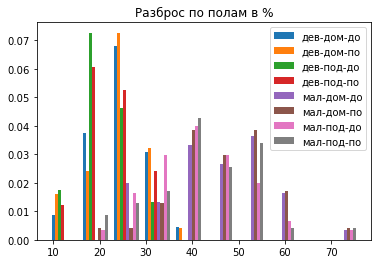

In [51]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам в %")
ax.hist([
    dfh_gdb, # девочки доминантная до
    dfh_gda, # девочки доминантная после
    dfh_gsb, # девочки подчиненная до
    dfh_gsa, # девочки подчиненная после
 
    dfh_bdb, # мальчики доминантная до
    dfh_bda, # мальчики доминантная после
    dfh_bsb, # мальчики подчиненная до
    dfh_bsa, # мальчики подчиненная после
],label=[
    "дев-дом-до", "дев-дом-по", "дев-под-до", "дев-под-по",
    "мал-дом-до", "мал-дом-по", "мал-под-до", "мал-под-по"
], density = True)
ax.legend(prop={'size': 10})
plt.show()

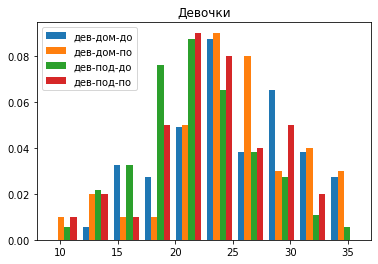

In [52]:
fig, ax = plt.subplots()
ax.set_title("Девочки")
ax.hist([
    dfh_gdb, # девочки доминантная до
    dfh_gda, # девочки доминантная после
    dfh_gsb, # девочки подчиненная до
    dfh_gsa, # девочки подчиненная после
],label=["дев-дом-до", "дев-дом-по", "дев-под-до", "дев-под-по",], density = True)
ax.legend(prop={'size': 10})
plt.show()

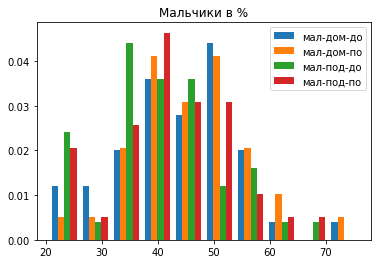

In [53]:
fig, ax = plt.subplots()
ax.set_title("Мальчики в %")
ax.hist([
    dfh_bdb, # мальчики доминантная до
    dfh_bda, # мальчики доминантная после
    dfh_bsb, # мальчики подчиненная до
    dfh_bsa, # мальчики подчиненная после
],label=["мал-дом-до", "мал-дом-по", "мал-под-до", "мал-под-по"], density = True)
ax.legend(prop={'size': 10})
plt.show()

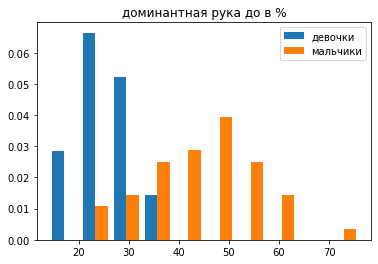

In [54]:
fig, ax = plt.subplots()
ax.set_title("доминантная рука до в %")
ax.hist([
    dfh_gdb, # Девочки доминантная до
    dfh_bdb, # Мальчики доминантная до
],label=["девочки", "мальчики"], density = True)
ax.legend(prop={'size': 10})
plt.show()

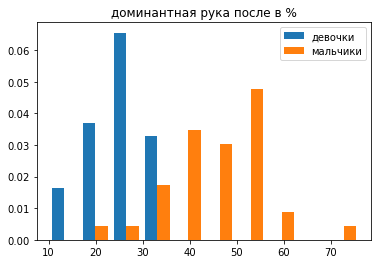

In [55]:
fig, ax = plt.subplots()
ax.set_title("доминантная рука после в %")
ax.hist([
    dfh_gda, # Девочки доминантная после
    dfh_bda, # Мальчики доминантная после
],label=["девочки", "мальчики"], density = True)
ax.legend(prop={'size': 10})
plt.show()

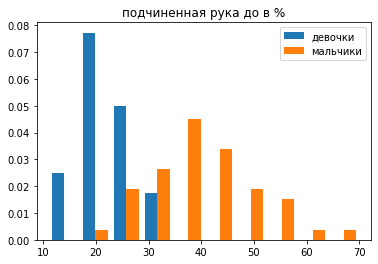

In [56]:
fig, ax = plt.subplots()
ax.set_title("подчиненная рука до в %")
ax.hist([
    dfh_gsb, # Девочки подчиненая до
    dfh_bsb, # Мальчики подчиненая до
],label=["девочки", "мальчики"], density = True)
ax.legend(prop={'size': 10})
plt.show()

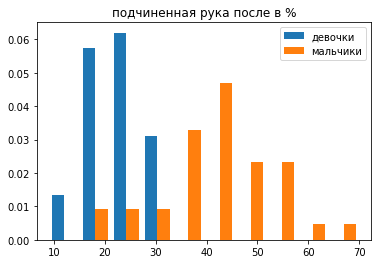

In [57]:
fig, ax = plt.subplots()
ax.set_title("подчиненная рука после в %")
ax.hist([
    dfh_gsa, # Девочки подчиненая после
    dfh_bsa, # Мальчики подчиненая после
],label=["девочки", "мальчики"], density = True)
ax.legend(prop={'size': 10})
plt.show()

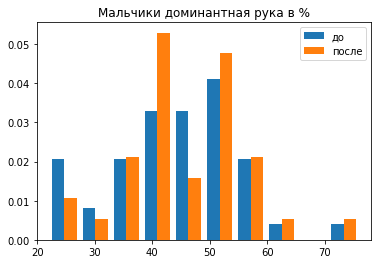

In [58]:
fig, ax = plt.subplots()
ax.set_title("Мальчики доминантная рука в %")
ax.hist([
    dfh_bdb, # Мальчики доминантная до
    dfh_bda, # Мальчики доминантная после
],label=["до", "после"], density = True)
ax.legend(prop={'size': 10})
plt.show()

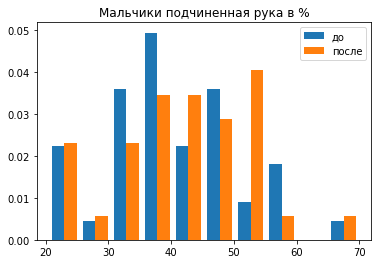

In [59]:
fig, ax = plt.subplots()
ax.set_title("Мальчики подчиненная рука в %")
ax.hist([
    dfh_bsb, # Мальчики подчиненная до
    dfh_bsa, # Мальчики подчиненная после
],label=["до", "после"], density = True)
ax.legend(prop={'size': 10})
plt.show()

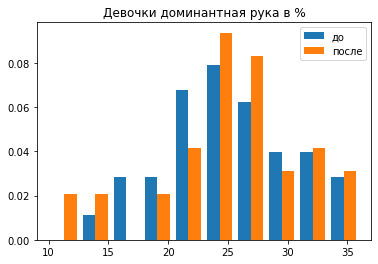

In [60]:
fig, ax = plt.subplots()
ax.set_title("Девочки доминантная рука в %")
ax.hist([
    dfh_gdb, # Девочки доминантная до
    dfh_gda, # Девочки доминантная после
],label=["до", "после"], density = True)
ax.legend(prop={'size': 10})
plt.show()

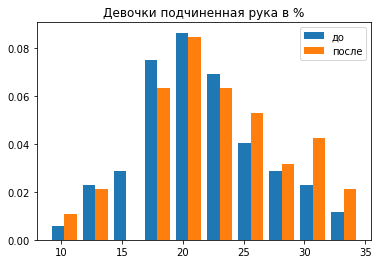

In [61]:
fig, ax = plt.subplots()
ax.set_title("Девочки подчиненная рука в %")
ax.hist([
    dfh_gsb, # Девочки подчиненная до
    dfh_gsa, # Девочки подчиненная после
],label=["до", "после"], density = True)
ax.legend(prop={'size': 10})
plt.show()

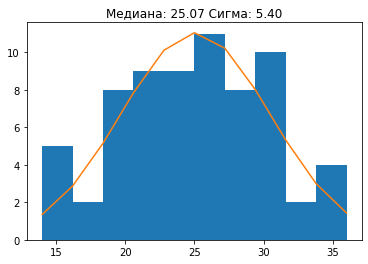

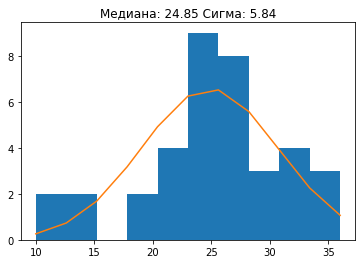

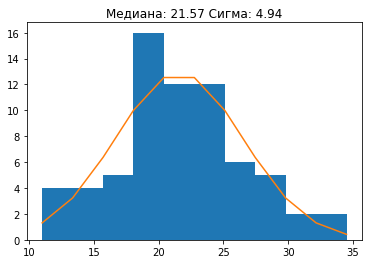

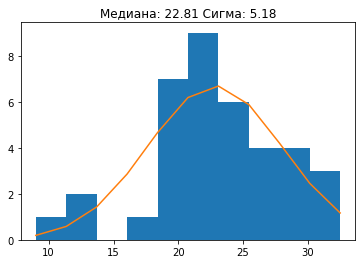

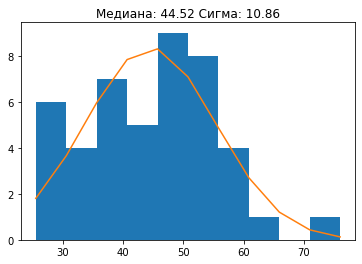

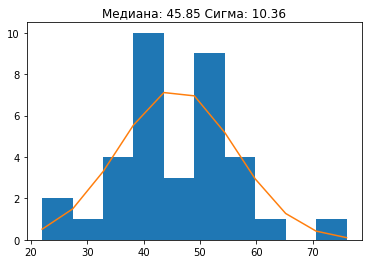

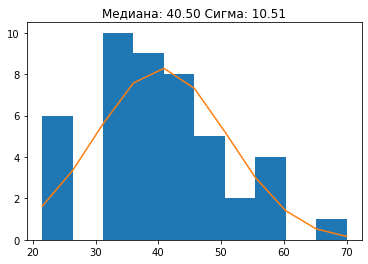

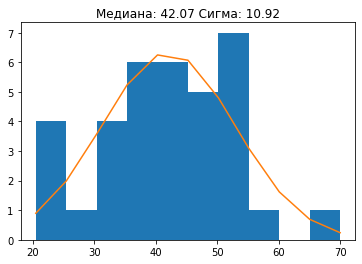

In [62]:
for ds in (
    dfh_gdb, # девочки доминантная до
    dfh_gda, # девочки доминантная после
    dfh_gsb, # девочки подчиненная до
    dfh_gsa, # девочки подчиненная после
 
    dfh_bdb, # мальчики доминантная до
    dfh_bda, # мальчики доминантная после
    dfh_bsb, # мальчики подчиненная до
    dfh_bsa, # мальчики подчиненная после
):
    draw_norm(ds)

In [63]:
# Тест на нормальное распределение по метрике Колмогорова-Смирнова
from scipy.stats import kstest, norm

for ds in (
    dfh_gdb, # девочки доминантная до
    dfh_gda, # девочки доминантная после
    dfh_gsb, # девочки подчиненная до
    dfh_gsa, # девочки подчиненная после
 
    dfh_bdb, # мальчики доминантная до
    dfh_bda, # мальчики доминантная после
    dfh_bsb, # мальчики подчиненная до
    dfh_bsa, # мальчики подчиненная после
):
    mu, sigma = norm.fit(ds)
    ks_statistic, p_value = kstest(ds.values, "norm", args=(mu, sigma))
    print(ks_statistic, p_value)

0.05892847462444639 0.9611417393621045
0.10541951648653164 0.7664311138703374
0.09030034103558882 0.603945968122942
0.12301043853942212 0.5872435711939841
0.08335714442502279 0.887606165782043
0.08238974824061562 0.9556827685464272
0.07461354494032668 0.9475663571988688
0.07482098405959847 0.981274272007231


In [64]:
# Сравнение руки до и после по метрике Колмогорова-Смирнова
from scipy.stats import ks_2samp
print(ks_2samp(dfh_gdb, dfh_gda)) # девочки доминантная до и после
print(ks_2samp(dfh_gsb, dfh_gsa)) # девочки подчиненная до и после
print(ks_2samp(dfh_bdb, dfh_bda)) # мальчики доминантная до и после
print(ks_2samp(dfh_bsb, dfh_bsa)) # мальчики подчиненная до и после

KstestResult(statistic=0.08267090620031796, pvalue=0.9894251843635216)
KstestResult(statistic=0.18799682034976153, pvalue=0.31419088227924685)
KstestResult(statistic=0.12063492063492064, pvalue=0.8996120223532625)
KstestResult(statistic=0.13015873015873017, pvalue=0.8429984502019647)


In [86]:
# Сравнение руки до и после по метрике t-тест зависимых выборок
from scipy.stats import ttest_rel
print(ttest_rel(dfh_gdb.head(37), dfh_gda)) # девочки доминантная до и после
print(ttest_rel(dfh_gsb.head(37), dfh_gsa)) # девочки подчиненная до и после
print(ttest_rel(dfh_bdb.head(35), dfh_bda)) # мальчики доминантная до и после
print(ttest_rel(dfh_bsb.head(35), dfh_bsa)) # мальчики подчиненная до и после

Ttest_relResult(statistic=1.6434365493891905, pvalue=0.10899956802208496)
Ttest_relResult(statistic=-2.0447756936490853, pvalue=0.04824135066918773)
Ttest_relResult(statistic=0.7668374736804325, pvalue=0.44847036410142216)
Ttest_relResult(statistic=0.5495018245568815, pvalue=0.586252618915303)


In [66]:
# Сравнение руки до и после критерий Манна-Уитни
from scipy.stats import mannwhitneyu
print(mannwhitneyu(dfh_gdb, dfh_gda)) # девочки доминантная до и после
print(mannwhitneyu(dfh_gsb, dfh_gsa)) # девочки подчиненная до и после
print(mannwhitneyu(dfh_bdb, dfh_bda)) # мальчики доминантная до и после
print(mannwhitneyu(dfh_bsb, dfh_bsa)) # мальчики подчиненная до и после

MannwhitneyuResult(statistic=1252.0, pvalue=0.9705436034708854)
MannwhitneyuResult(statistic=1036.5, pvalue=0.13769191492531627)
MannwhitneyuResult(statistic=728.5, pvalue=0.5703409233951022)
MannwhitneyuResult(statistic=708.5, pvalue=0.4462339647205842)


In [67]:
#  Сравнение мальчиков и девочек по метрике Колмогорова-Смирнова
from scipy.stats import ks_2samp
print(ks_2samp(dfh_gdb, dfh_bdb)) # правая до мальчики и девочки
print(ks_2samp(dfh_gsb, dfh_bsb)) # левая до мальчики и девочки
print(ks_2samp(dfh_gda, dfh_bda)) # правая после мальчики и девочки
print(ks_2samp(dfh_gsa, dfh_bsa)) # левая после мальчики и девочки

KstestResult(statistic=0.7856209150326797, pvalue=3.3306690738754696e-16)
KstestResult(statistic=0.8372549019607843, pvalue=3.3306690738754696e-16)
KstestResult(statistic=0.8872586872586873, pvalue=4.551914400963142e-15)
KstestResult(statistic=0.8285714285714286, pvalue=7.259748358023899e-13)


In [68]:
#  Сравнение мальчиков и девочек по метрике t-тест
from scipy.stats import ks_2samp
print(ttest_ind(dfh_gdb, dfh_bdb)) # правая до мальчики и девочки
print(ttest_ind(dfh_gsb, dfh_bsb)) # левая до мальчики и девочки
print(ttest_ind(dfh_gda, dfh_bda)) # правая после мальчики и девочки
print(ttest_ind(dfh_gsa, dfh_bsa)) # левая после мальчики и девочки

Ttest_indResult(statistic=-12.485818334714214, pvalue=7.011810233263998e-23)
Ttest_indResult(statistic=-12.743819513201371, pvalue=1.8259457620001852e-23)
Ttest_indResult(statistic=-10.51876059253976, pvalue=4.678748063109246e-16)
Ttest_indResult(statistic=-9.511499126127784, pvalue=3.072644536585809e-14)


In [69]:
#  Сравнение мальчиков и девочек критерий Манна-Уитни
from scipy.stats import mannwhitneyu
print(mannwhitneyu(dfh_gdb, dfh_bdb)) # правая до мальчики и девочки
print(mannwhitneyu(dfh_gsb, dfh_bsb)) # левая до мальчики и девочки
print(mannwhitneyu(dfh_gda, dfh_bda)) # правая после мальчики и девочки
print(mannwhitneyu(dfh_gsa, dfh_bsa)) # левая после мальчики и девочки

MannwhitneyuResult(statistic=179.0, pvalue=2.3120807016245156e-15)
MannwhitneyuResult(statistic=142.5, pvalue=4.0316956869780367e-16)
MannwhitneyuResult(statistic=45.0, pvalue=1.1624195876332745e-11)
MannwhitneyuResult(statistic=87.5, pvalue=2.829509398184684e-10)
